In [2]:
import pandas as pd

In [3]:
purchases = pd.read_csv('data/purchases.csv')

In [4]:
purchases.head()

,date,amount
0,2012-07-25,82.55
1,2012-12-10,61.01
2,2013-02-19,11.54
3,2013-02-24,66.67
4,2013-04-20,7.99


In [5]:
purchases['cumsum'] = purchases['amount'].cumsum()

In [6]:
purchases = purchases[['date', 'cumsum']]
purchases.columns = ['ds', 'y']
purchases.head()

,ds,y
0,2012-07-25,82.55
1,2012-12-10,143.56
2,2013-02-19,155.10
3,2013-02-24,221.77
4,2013-04-20,229.76


In [7]:
from fbprophet import Prophet

In [8]:
m = Prophet(daily_seasonality = False)
m.fit(purchases)

/Users/Alistair/anaconda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = m.make_future_dataframe(periods=365)

In [10]:
future.tail()

,ds
443,2019-01-27
444,2019-01-28
445,2019-01-29
446,2019-01-30
447,2019-01-31


In [11]:
forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
443,2019-01-27,7865.917844,7678.324467,8135.380951,7667.643134,8062.028542,56.854664,56.854664,56.854664,8.542288,8.542288,8.542288,48.312376,48.312376,48.312376,0.0,0.0,0.0,7922.772508
444,2019-01-28,7873.442744,7671.056280,8117.050070,7673.988624,8070.720525,27.477412,27.477412,27.477412,-16.455250,-16.455250,-16.455250,43.932662,43.932662,43.932662,0.0,0.0,0.0,7900.920156
445,2019-01-29,7880.967644,7636.345678,8112.922905,7680.211389,8079.046965,-0.498447,-0.498447,-0.498447,-40.062605,-40.062605,-40.062605,39.564158,39.564158,39.564158,0.0,0.0,0.0,7880.469197
446,2019-01-30,7888.492544,7684.683044,8150.433652,7686.433345,8087.890770,41.953779,41.953779,41.953779,6.720439,6.720439,6.720439,35.233340,35.233340,35.233340,0.0,0.0,0.0,7930.446322
447,2019-01-31,7896.017443,7750.670733,8217.192065,7692.655301,8096.717824,97.786385,97.786385,97.786385,66.825393,66.825393,66.825393,30.960992,30.960992,30.960992,0.0,0.0,0.0,7993.803828


In [1]:
import matplotlib.pyplot as plt

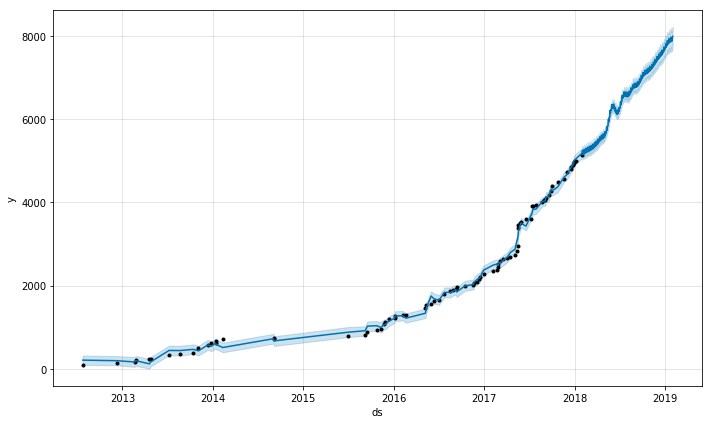

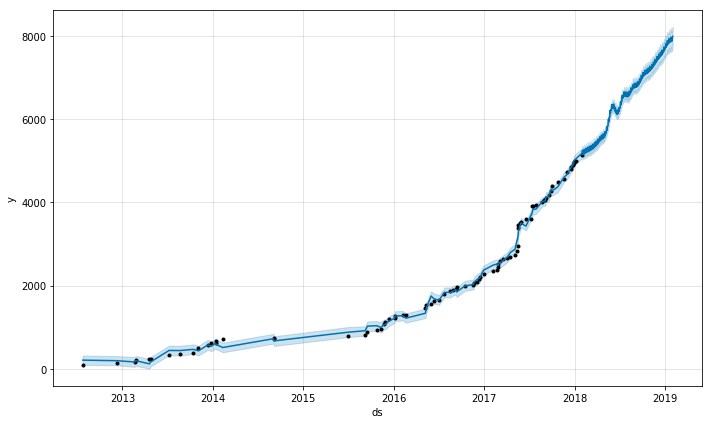

In [13]:
m.plot(forecast)

In [ ]:
plt